# House Price Prediction with Linear Regression

### Author: Eren ERİŞ

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats #İstatistik Kütüphanesi
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df=pd.read_csv('kc_house_data.csv');

### EDA- Exploratory Data Analysis

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()#Variable Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isnull().sum() # Total Number of Null Values in Columns

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe() #statistical data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.corr(numeric_only=True) #Correlation Data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


### Data Visualization 

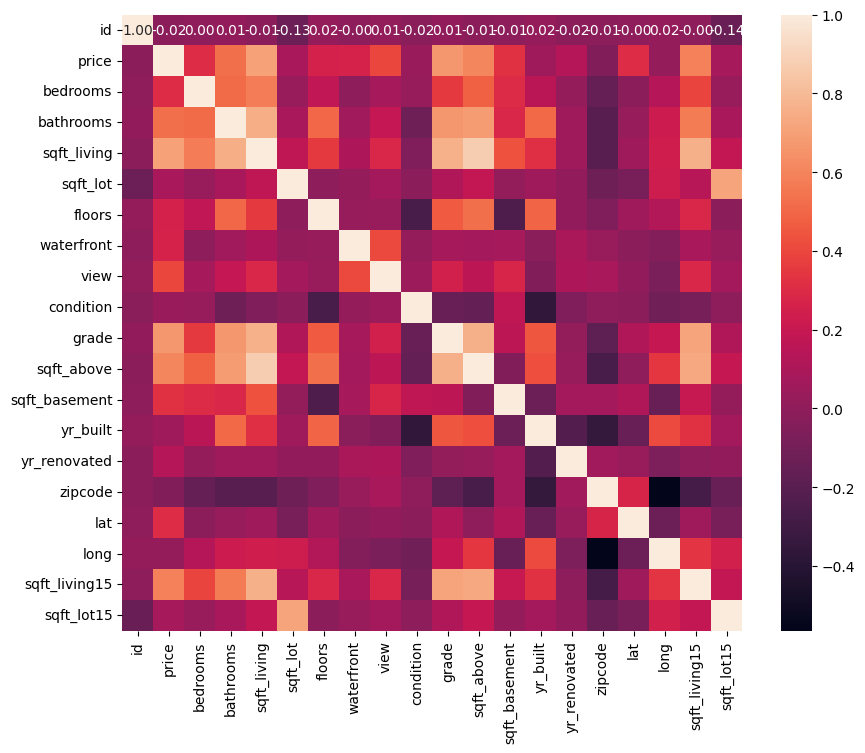

In [8]:
plt.figure(figsize=(10, 8))  # Örnek olarak 10x8 boyutunda bir plot
sns.heatmap(df.corr(numeric_only=True), annot=True ,  fmt='.2f')
plt.show()

In [9]:
#Regresyon Kural 1
#Korelasyon - Korelasyonu 0,20'nin üzerinde ve 0,90'ın altında olan bir alan kullanacağız
#0.20'nin katkısı çok düşük
#0,90'ın üzerindeki veriler farklı bir biçimde kendini tekrarladı

In [10]:
abs(df.corr(numeric_only=True)['price'].sort_values(ascending=False))

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id               0.016762
zipcode          0.053203
Name: price, dtype: float64

In [11]:
stats.ttest_ind(df['sqft_living'],df['price'])

TtestResult(statistic=-215.44109053395178, pvalue=0.0, df=43224.0)

In [12]:
stats.ttest_ind(df['sqft_above'],df['price'])

TtestResult(statistic=-215.5579491794509, pvalue=0.0, df=43224.0)

### Data Preparation

In [13]:
x = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','view','sqft_basement','bedrooms','lat','waterfront','floors']]
y = df[['price']]

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [15]:
x_train,y_train

(       sqft_living  grade  sqft_above  sqft_living15  bathrooms  view  \
 6325          1780      9        1780           2750       1.75     0   
 13473         1000      6         800           1270       1.00     0   
 17614         1080      6         990           1170       1.00     0   
 16970         2090      7        1280           1800       2.25     0   
 20868         1741      8        1446           2090       2.50     0   
 ...            ...    ...         ...            ...        ...   ...   
 11964         1000      7        1000           1000       1.50     0   
 21575         3087      8        3087           2927       2.50     0   
 5390          2120      7        2120           1690       2.50     0   
 860            380      5         380           1170       0.75     0   
 15795         3130      7        3130           3020       2.50     0   
 
        sqft_basement  bedrooms      lat  waterfront  floors  
 6325               0         3  47.3670       

In [16]:
lr = LinearRegression()
model=lr.fit(x_train,y_train)
predict=model.predict(x_test)

In [17]:
r2_score(predict,y_test)  

0.4683290504523565

In [18]:
# This value is low because there is no brand and vehicle type in the training data. 
# These values affect the price considerably. What we need to do is to educate them too.

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id               0.016762
zipcode          0.053203

SyntaxError: invalid syntax (3861463740.py, line 4)

In [ ]:
df["age"] = (2023 - df['yr_built'])
df["zipcode"] = df["zipcode"].astype('object')

In [ ]:
sns.boxplot(x=df['bedrooms']) #outlier of bedrooms

In [ ]:
sns.boxplot(x=df['bathrooms']) #outlier of bathrooms

In [ ]:
outliers=df.quantile(.97)
df=df[df['price']<outliers['price']]
df=df[df['bedrooms']<outliers['bedrooms']]
df=df[df['bathrooms']<outliers['bathrooms']]

In [ ]:
x1 = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','view','sqft_basement','bedrooms','lat','waterfront','floors','yr_renovated','sqft_lot','sqft_lot15','age','condition','long','zipcode']]
y1 = df[['price']]

In [ ]:
x1=pd.get_dummies(x1,drop_first=True)
x1

In [ ]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.001,random_state=42)

In [ ]:
lr = LinearRegression()
model2=lr.fit(x1_train,y1_train)
predict2=model2.predict(x1_test)

In [ ]:
r2_score(predict2,y1_test)  # Education was completed with high success

In [ ]:
#Tested with 2 different models for verification

In [ ]:
R=Ridge()
R.fit(x1_train,y1_train)
predict3=R.predict(x1_test)

In [ ]:
r2_score(predict3,y1_test)

In [ ]:
L=Lasso()
L.fit(x1_train,y1_train)
predict4=L.predict(x1_test)

In [ ]:
r2_score(predict4,y1_test)

In [ ]:
#Error amount calculation was made

In [ ]:
mean_squared_error(predict,y_test)**.5  

In [ ]:
mean_squared_error(predict2,y1_test)**.5

In [ ]:
mean_squared_error(predict3,y1_test)**.5

In [ ]:
mean_squared_error(predict4,y1_test)**.5